In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database (it will create one in memory for Colab)
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert sample data
sample_data = [
    ('Apple', 10, 2.5),
    ('Banana', 5, 1.0),
    ('Orange', 8, 1.5),
    ('Apple', 7, 2.5),
    ('Banana', 6, 1.0)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()


In [2]:
query = '''
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

df = pd.read_sql_query(query, conn)
print("=== Sales Summary ===")
print(df)


=== Sales Summary ===
  product  total_qty  revenue
0   Apple         17     42.5
1  Banana         11     11.0
2  Orange          8     12.0


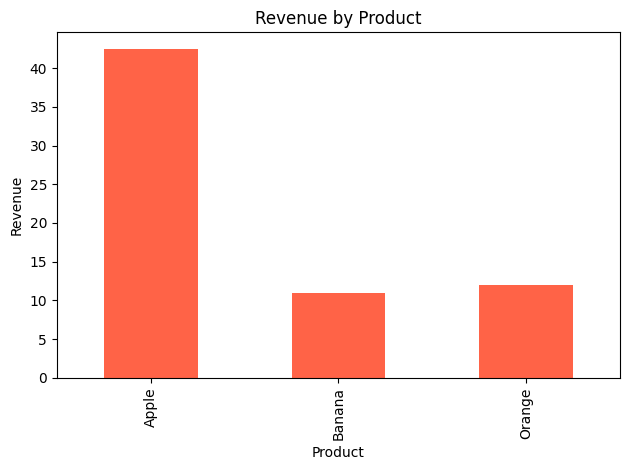

In [4]:
df.plot(kind='bar', x='product', y='revenue', color='tomato', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()


In [5]:
from google.colab import files

# Download database and chart image
files.download("sales_data.db")
files.download("sales_chart.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>